# Practica 4
***

* Garcia Saavedra Armando
* Orozco Guillen Jorge David
* Rodriguez Nuñez Diego Eduardo

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Cargamos los datos y hacemos un pequeño analisis

In [227]:
df = pd.read_csv('SuperStore_Sales_Dataset.csv')
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [229]:
c=df['Category'].value_counts()
print(c)

Category
Office Supplies    3569
Furniture          1249
Technology         1083
Name: count, dtype: int64


In [230]:
balance = len(df[df['Category'] == 'Office Supplies'])/len(df[df['Category']== 'Technology'])
balance

3.2954755309325945

Vemos que tiene un IR de 3.3 lo que indica que esta desbalanceado

In [231]:
df.isna()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
5897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
5898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
5899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True


In [232]:
df.drop("ind1", axis=1, inplace=True)
df.drop("ind2", axis=1, inplace=True)

In [233]:
df['Returns'].fillna(0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5896    0.0
5897    1.0
5898    0.0
5899    0.0
5900    0.0
Name: Returns, Length: 5901, dtype: float64

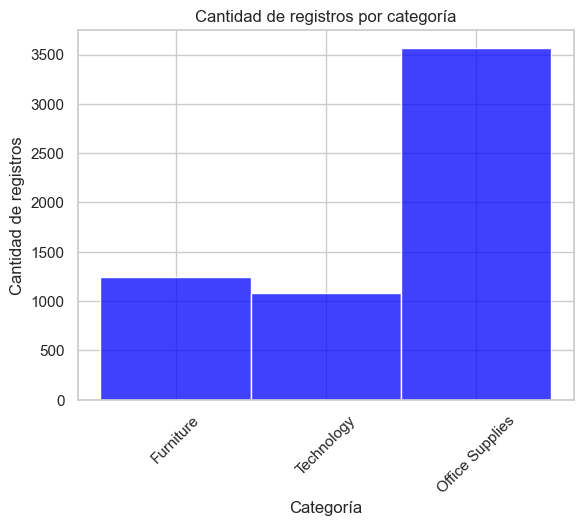

In [234]:
sns.histplot(data=df, x="Category")
plt.title("Cantidad de registros por categoría")
plt.xticks(rotation=45)
plt.xlabel("Categoría")
plt.ylabel("Cantidad de registros")
plt.show()

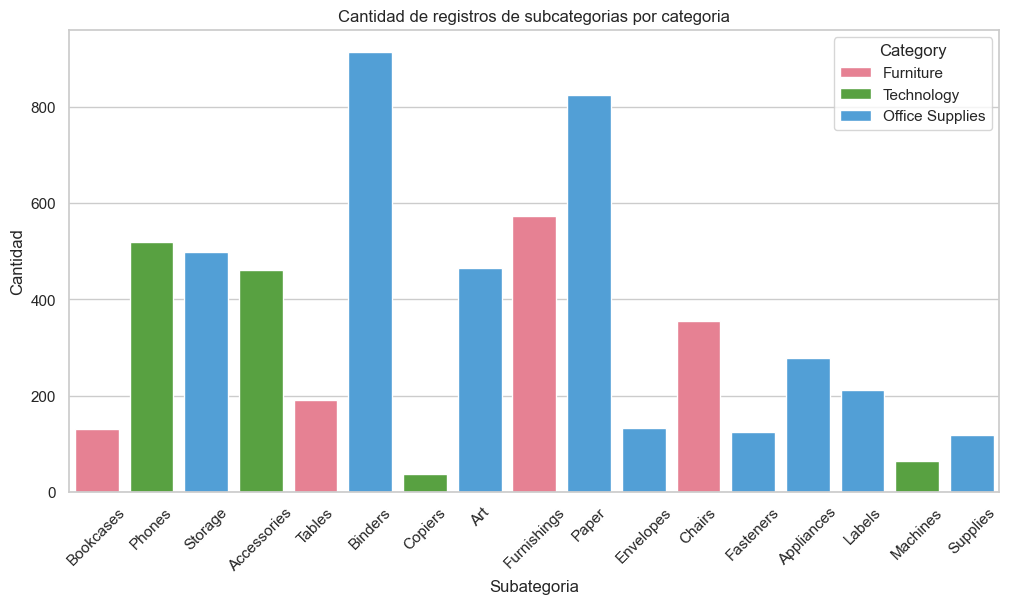

In [235]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sub-Category', hue='Category')
plt.title('Cantidad de registros de subcategorias por categoria')
plt.xticks(rotation=45)
plt.xlabel('Subategoria')
plt.ylabel('Cantidad')
plt.show()

## Hacemos un análisis inicial del dataset sin limpiar

### Método de pago más utilizado

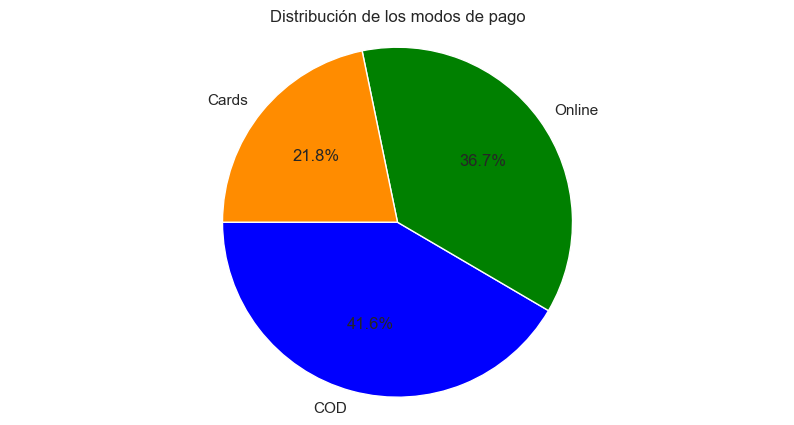

In [236]:
payment_mode_count = df['Payment Mode'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(payment_mode_count, labels=payment_mode_count.index, autopct='%1.1f%%', startangle=180, colors=['blue','green','darkorange'])
plt.axis('equal')
plt.title('Distribución de los modos de pago')
plt.show()

### Categoría de productos más comprada

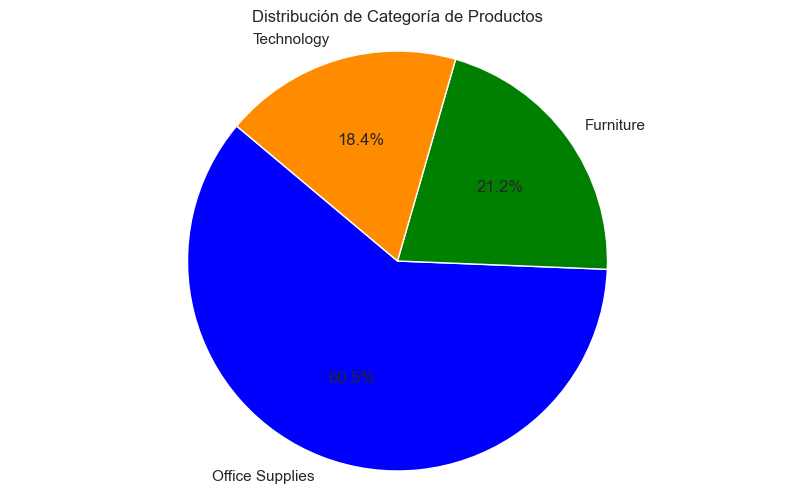

In [237]:
payment_mode_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'darkorange'])
plt.axis('equal')

plt.title('Distribución de Categoría de Productos')
plt.show()

### Top 10 ciudades con más transacciones

In [238]:
top_10_cities = df['City'].value_counts().head(10)

print("Las 10 ciudades con más transacciones son: ")
print(top_10_cities)

Las 10 ciudades con más transacciones son: 
City
New York City    563
Los Angeles      430
Philadelphia     310
San Francisco    304
Seattle          282
Houston          204
Chicago          197
Columbus         138
Dallas           110
Springfield      100
Name: count, dtype: int64


### Método de pago más utilizado por cada una de las top 10 ciudades

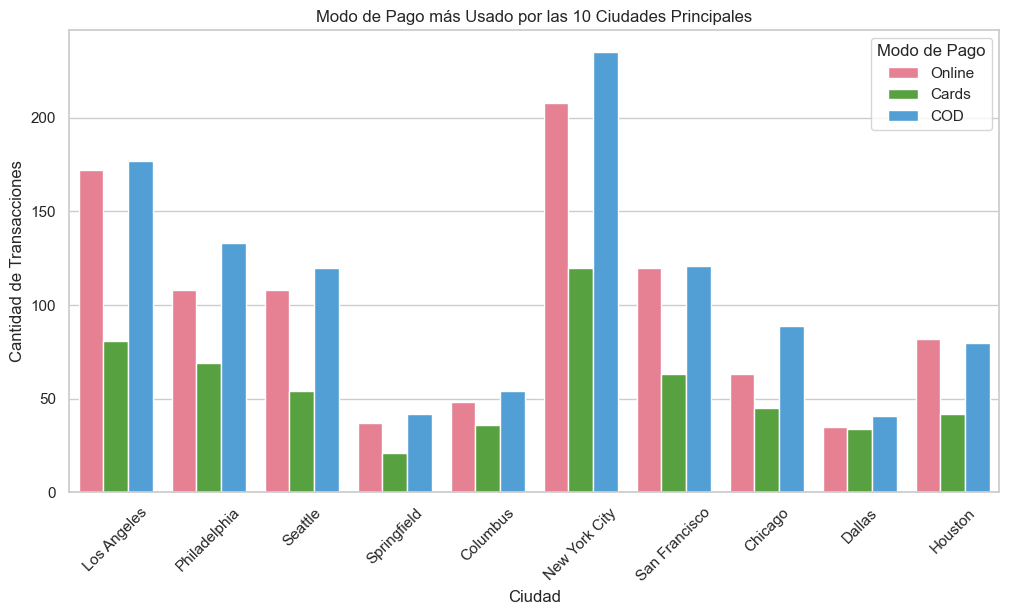

In [239]:
df_top_10_cities = df[df['City'].isin(top_10_cities.index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_cities, x='City', hue='Payment Mode')
plt.title('Modo de Pago más Usado por las 10 Ciudades Principales')
plt.xticks(rotation=45)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Modo de Pago')

plt.show()

### Categoría de producto más comprada por cada una de las 10 ciudades

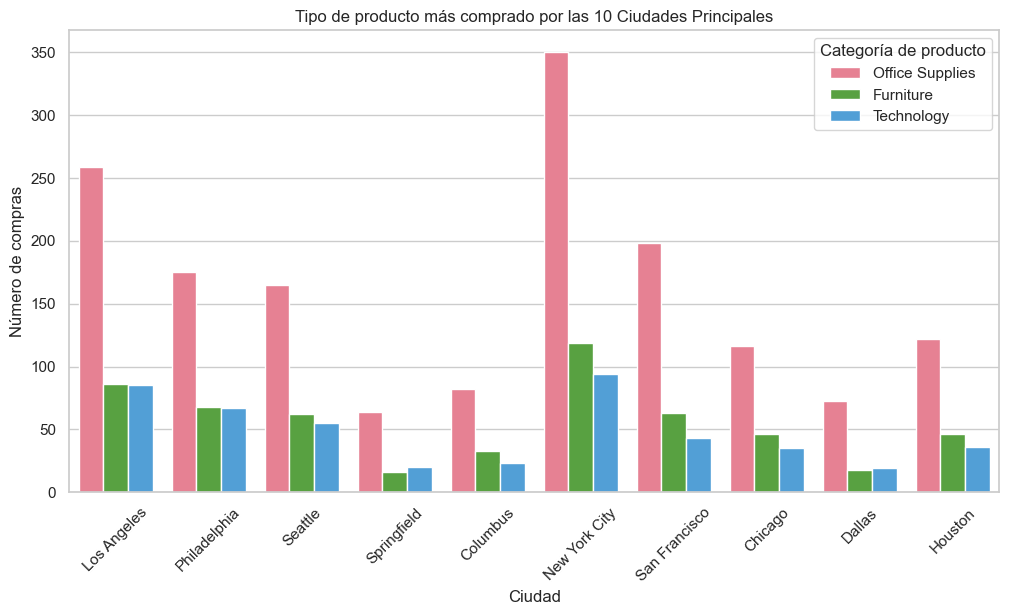

In [240]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_cities, x='City', hue='Category')
plt.title('Tipo de producto más comprado por las 10 Ciudades Principales')
plt.xticks(rotation=45)
plt.xlabel('Ciudad')
plt.ylabel('Número de compras')
plt.legend(title='Categoría de producto')

### Mostrar los productos que fueron regresados

In [241]:
returned=df.loc[df["Returns"]!= 0]
returned[['Product Name', 'Quantity', 'Returns']]


,Product Name,Quantity,Returns
0,"Bush Westfield Collection Bookcases, Medium Ch...",1,NaN
1,"Bush Westfield Collection Bookcases, Medium Ch...",3,NaN
2,GE 30522EE2,2,NaN
3,Recycled Steel Personal File for Hanging File ...,2,NaN
4,Imation Clip USB flash drive - 8 GB,2,NaN
...,...,...,...
5896,"Bush Westfield Collection Bookcases, Fully Ass...",4,NaN
5897,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",2,1.0
5898,Bagged Rubber Bands,3,NaN
5899,Wilson Jones Legal Size Ring Binders,3,NaN


### Mostrar las ventas y ganancias

In [242]:
profit=df.loc[df["Profit"] >= 0]
profit[["Sales","Profit"]]

,Sales,Profit
0,73.940,28.2668
1,173.940,38.2668
2,231.980,67.2742
3,114.460,28.6150
6,180.960,13.5720
...,...,...
5894,509.300,56.5110
5895,496.720,6.4750
5896,213.136,12.1176
5897,295.904,4.5188


### Mostrar las transacciones con pérdidas

In [243]:
loses=df.loc[df["Profit"]<0]
loses[["Sales","Profit"]]

,Sales,Profit
4,30.0800,-5.2640
5,165.6000,-6.2100
11,104.5800,-80.1780
16,23.0760,-10.9611
20,30.8280,-24.6624
...,...,...
5875,1302.9680,-2.3904
5880,188.8528,-11.5960
5886,119.5680,-44.2764
5898,388.0240,-0.6048


### Mostrar el porcentaje total de ganancias y pérdidas con base en las ventas totales

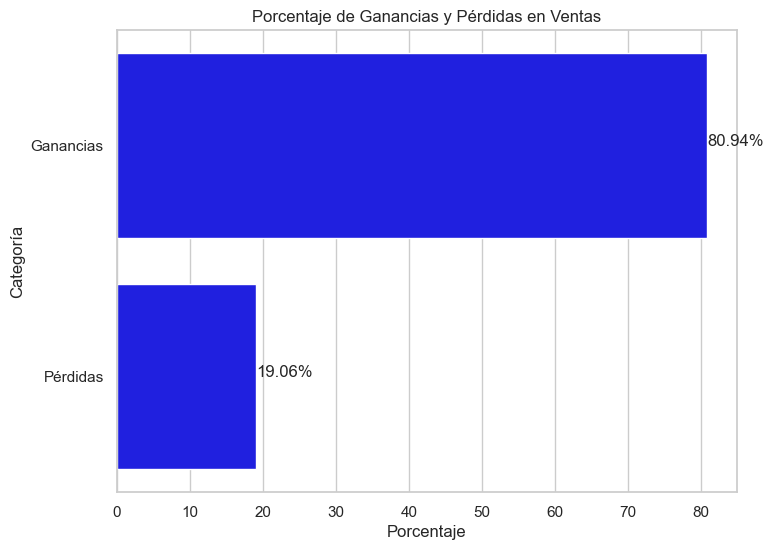

In [244]:
# Calcular los totales de ventas para ganancias y pérdidas
total_sales = df["Sales"].sum()
total_profit = profit["Sales"].sum()
total_loses = loses["Sales"].sum()

# Calcular los porcentajes
percentage_profit = (total_profit / total_sales) * 100
percentage_loses = (total_loses / total_sales) * 100

# Crear un DataFrame para los datos
data = {
    "Categoría": ["Ganancias", "Pérdidas"],
    "Porcentaje": [percentage_profit, percentage_loses]
}

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
colors = ["blue", "orange"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(x="Porcentaje", y="Categoría", data=data)
plt.title("Porcentaje de Ganancias y Pérdidas en Ventas")
plt.xlabel("Porcentaje")
plt.ylabel("Categoría")

# Mostrar el porcentaje en las barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha="left")

plt.show()


### Correlación entre ventas, ganancias y las devoluciones

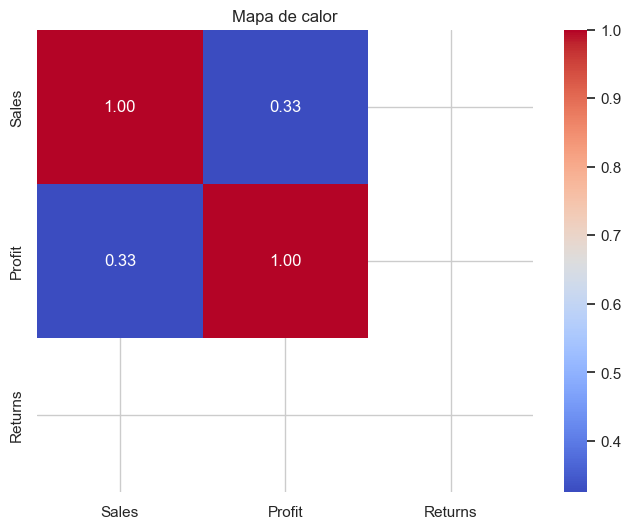

In [245]:
columns = ["Sales", "Profit", "Returns"]
correlation_matrix = df[columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor")
plt.show()

## Balanceamos el dataset

Para balancearlo borramos aproximadamente 300 datos aleatoriamente de la categoria 'Office Supplies' y que pertenezcan a las subcategorias 'Binders' y 'Paper

In [246]:
df1 = df[df['Category']=='Furniture']
df1

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1,28.2668,NaN,Online
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,NaN,Online
7,9494,CA-2019-105207,03-01-2019,08-01-2019,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,Central,FUR-TA-10000617,Furniture,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.850,7,350.4270,NaN,COD
16,8031,CA-2019-158806,07-01-2019,11-01-2019,Standard Class,NM-18520,Neoma Murray,Consumer,United States,Amarillo,...,Central,FUR-FU-10004270,Furniture,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",23.076,3,-10.9611,NaN,COD
18,6851,US-2019-100461,08-01-2019,12-01-2019,Standard Class,JO-15145,Jack O'Briant,Corporate,United States,Franklin,...,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",1565.880,6,407.1288,NaN,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,7636,US-2020-158526,29-12-2020,01-01-2021,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",351.980,1,87.2842,NaN,COD
5886,1878,CA-2020-118885,29-12-2020,02-01-2021,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",119.568,4,-44.2764,NaN,COD
5888,7633,US-2020-158526,29-12-2020,01-01-2021,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,South,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,460.840,8,314.0384,NaN,COD
5892,5458,CA-2020-130631,29-12-2020,02-01-2021,Standard Class,BS-11755,Bruce Stewart,Consumer,United States,Edmonds,...,West,FUR-FU-10004093,Furniture,Furnishings,Hand-Finished Solid Wood Document Frame,466.460,2,20.5380,1.0,COD


In [247]:
df2 = df[df['Category']=='Technology']
df2

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.980,2,67.2742,NaN,Cards
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2,-5.2640,NaN,Online
5,8605,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002942,Technology,Accessories,WD My Passport Ultra 1TB Portable External Har...,165.600,3,-6.2100,NaN,Online
6,8606,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-PH-10002890,Technology,Phones,AT&T 17929 Lendline Telephone,180.960,5,13.5720,NaN,Cards
9,2898,US-2019-164630,04-01-2019,09-01-2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Charlotte,...,South,TEC-CO-10000971,Technology,Copiers,Hewlett Packard 310 Color Digital Copier,959.968,4,119.9960,NaN,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,9377,CA-2020-108756,25-12-2020,29-12-2020,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,East Orange,...,East,TEC-AC-10003237,Technology,Accessories,Memorex Micro Travel Drive 4 GB,379.800,3,13.6740,NaN,COD
5860,2570,CA-2020-134404,27-12-2020,27-12-2020,Same Day,DR-12880,Dan Reichenbach,Corporate,United States,Newark,...,East,TEC-PH-10000576,Technology,Phones,AT&T 1080 Corded phone,928.388,2,-35.6174,NaN,COD
5878,574,CA-2020-164826,28-12-2020,04-01-2021,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,...,East,TEC-PH-10000347,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,381.850,3,4.0095,NaN,COD
5885,1879,CA-2020-118885,29-12-2020,02-01-2021,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,156.376,3,22.6782,NaN,Online


In [248]:
df3 = df[df['Category']=='Office Supplies']
df3

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,NaN,Online
8,9495,CA-2019-105207,03-01-2019,08-01-2019,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,Central,OFF-BI-10004364,Office Supplies,Binders,Storex Dura Pro Binders,11.880,2,5.3460,NaN,COD
10,5868,CA-2019-158211,04-01-2019,08-01-2019,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Philadelphia,...,East,OFF-AR-10004078,Office Supplies,Art,Newell 312,4.672,1,0.5840,NaN,Online
11,5869,CA-2019-158211,04-01-2019,08-01-2019,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Philadelphia,...,East,OFF-BI-10002026,Office Supplies,Binders,Avery Arch Ring Binders,104.580,6,-80.1780,NaN,Online
13,864,CA-2019-134474,05-01-2019,07-01-2019,Second Class,AJ-10795,Anthony Johnson,Corporate,United States,Jacksonville,...,South,OFF-AR-10003958,Office Supplies,Art,Newell 337,5.248,2,0.5904,NaN,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,1298,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,496.720,2,6.4750,1.0,Online
5897,1297,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,1.0,Online
5898,5092,CA-2020-156720,30-12-2020,03-01-2021,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,NaN,Online
5899,909,CA-2020-143259,30-12-2020,03-01-2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,462.776,3,19.7910,NaN,COD


In [249]:
binders = df3[df3['Sub-Category']=='Binders']
papers = df3[df3['Sub-Category']=='Paper']

binders_a_borrar = random.sample(list(binders.index), 400)
papers_a_borrar = random.sample(list(papers.index), 400)

df3.drop(binders_a_borrar,inplace=True)

df3

C:\Users\dern9\AppData\Local\Temp\ipykernel_10948\2971339197.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(binders_a_borrar,inplace=True)


,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,NaN,Online
10,5868,CA-2019-158211,04-01-2019,08-01-2019,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Philadelphia,...,East,OFF-AR-10004078,Office Supplies,Art,Newell 312,4.672,1,0.5840,NaN,Online
11,5869,CA-2019-158211,04-01-2019,08-01-2019,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Philadelphia,...,East,OFF-BI-10002026,Office Supplies,Binders,Avery Arch Ring Binders,104.580,6,-80.1780,NaN,Online
13,864,CA-2019-134474,05-01-2019,07-01-2019,Second Class,AJ-10795,Anthony Johnson,Corporate,United States,Jacksonville,...,South,OFF-AR-10003958,Office Supplies,Art,Newell 337,5.248,2,0.5904,NaN,Online
15,2162,CA-2019-101938,07-01-2019,12-01-2019,Standard Class,DW-13480,Dianna Wilson,Home Office,United States,Oakland,...,West,OFF-AR-10003696,Office Supplies,Art,Panasonic KP-350BK Electric Pencil Sharpener w...,34.580,1,10.0282,NaN,COD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5894,646,CA-2020-126221,30-12-2020,05-01-2021,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,509.300,2,56.5110,NaN,COD
5895,1298,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,496.720,2,6.4750,1.0,Online
5897,1297,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,1.0,Online
5898,5092,CA-2020-156720,30-12-2020,03-01-2021,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,NaN,Online


In [250]:
df3.drop(papers_a_borrar,inplace=True)

df3

C:\Users\dern9\AppData\Local\Temp\ipykernel_10948\2645693427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(papers_a_borrar,inplace=True)


,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,NaN,Online
10,5868,CA-2019-158211,04-01-2019,08-01-2019,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Philadelphia,...,East,OFF-AR-10004078,Office Supplies,Art,Newell 312,4.672,1,0.5840,NaN,Online
11,5869,CA-2019-158211,04-01-2019,08-01-2019,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Philadelphia,...,East,OFF-BI-10002026,Office Supplies,Binders,Avery Arch Ring Binders,104.580,6,-80.1780,NaN,Online
13,864,CA-2019-134474,05-01-2019,07-01-2019,Second Class,AJ-10795,Anthony Johnson,Corporate,United States,Jacksonville,...,South,OFF-AR-10003958,Office Supplies,Art,Newell 337,5.248,2,0.5904,NaN,Online
15,2162,CA-2019-101938,07-01-2019,12-01-2019,Standard Class,DW-13480,Dianna Wilson,Home Office,United States,Oakland,...,West,OFF-AR-10003696,Office Supplies,Art,Panasonic KP-350BK Electric Pencil Sharpener w...,34.580,1,10.0282,NaN,COD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5894,646,CA-2020-126221,30-12-2020,05-01-2021,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,509.300,2,56.5110,NaN,COD
5895,1298,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,496.720,2,6.4750,1.0,Online
5897,1297,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,1.0,Online
5898,5092,CA-2020-156720,30-12-2020,03-01-2021,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,NaN,Online


In [251]:
dfb = pd.concat([df1,df2,df3],ignore_index=True)
dfb

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1,28.2668,NaN,Online
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,NaN,Online
2,9494,CA-2019-105207,03-01-2019,08-01-2019,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,Central,FUR-TA-10000617,Furniture,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.850,7,350.4270,NaN,COD
3,8031,CA-2019-158806,07-01-2019,11-01-2019,Standard Class,NM-18520,Neoma Murray,Consumer,United States,Amarillo,...,Central,FUR-FU-10004270,Furniture,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",23.076,3,-10.9611,NaN,COD
4,6851,US-2019-100461,08-01-2019,12-01-2019,Standard Class,JO-15145,Jack O'Briant,Corporate,United States,Franklin,...,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",1565.880,6,407.1288,NaN,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,646,CA-2020-126221,30-12-2020,05-01-2021,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,509.300,2,56.5110,NaN,COD
5097,1298,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,496.720,2,6.4750,1.0,Online
5098,1297,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,1.0,Online
5099,5092,CA-2020-156720,30-12-2020,03-01-2021,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,NaN,Online


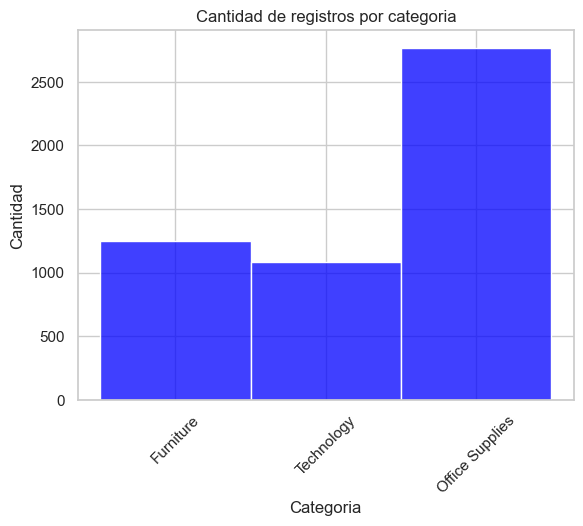

In [252]:
sns.histplot(data=dfb, x='Category')
plt.title('Cantidad de registros por categoria')
plt.xticks(rotation=45)
plt.xlabel('Categoria')
plt.ylabel('Cantidad')
plt.show()

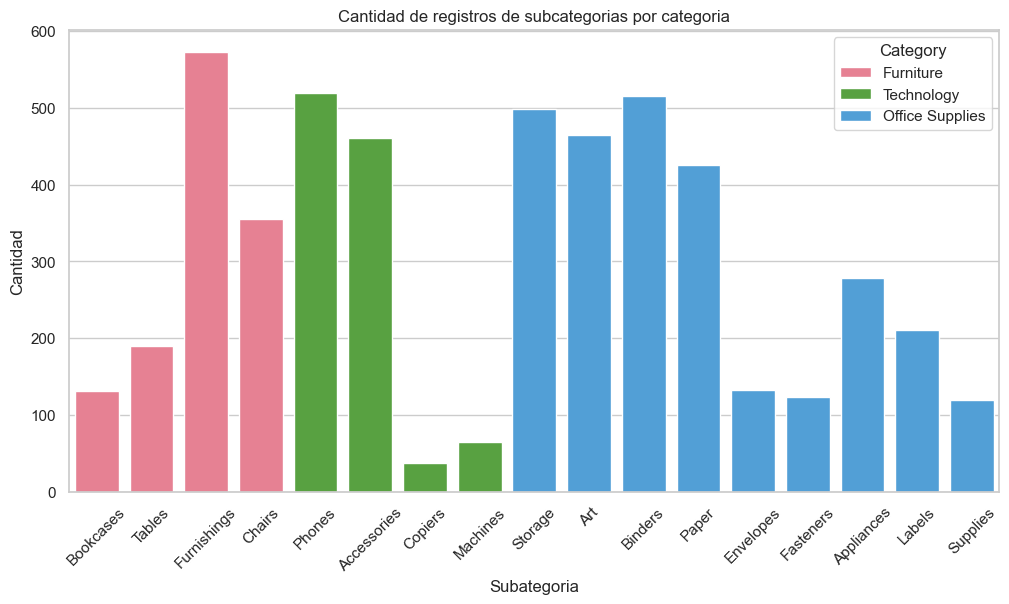

In [253]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dfb, x='Sub-Category', hue='Category')
plt.title('Cantidad de registros de subcategorias por categoria')
plt.xticks(rotation=45)
plt.xlabel('Subategoria')
plt.ylabel('Cantidad')
plt.show()

In [254]:
c=dfb['Category'].value_counts()
print(c)

Category
Office Supplies    2769
Furniture          1249
Technology         1083
Name: count, dtype: int64


In [255]:
balance = len(dfb[dfb['Category'] == 'Office Supplies'])/len(dfb[dfb['Category']== 'Technology'])
balance

2.556786703601108

## Realizamos el mismo análisis para el dataset balanceado

### Método de pago más utilizado

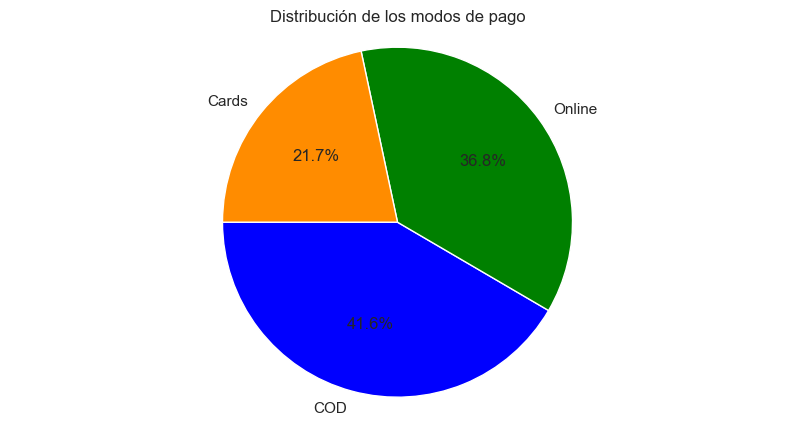

In [256]:
payment_mode_count = dfb['Payment Mode'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(payment_mode_count, labels=payment_mode_count.index, autopct='%1.1f%%', startangle=180, colors=['blue','green','darkorange'])
plt.axis('equal')
plt.title('Distribución de los modos de pago')
plt.show()

### Categoría de productos más comprada

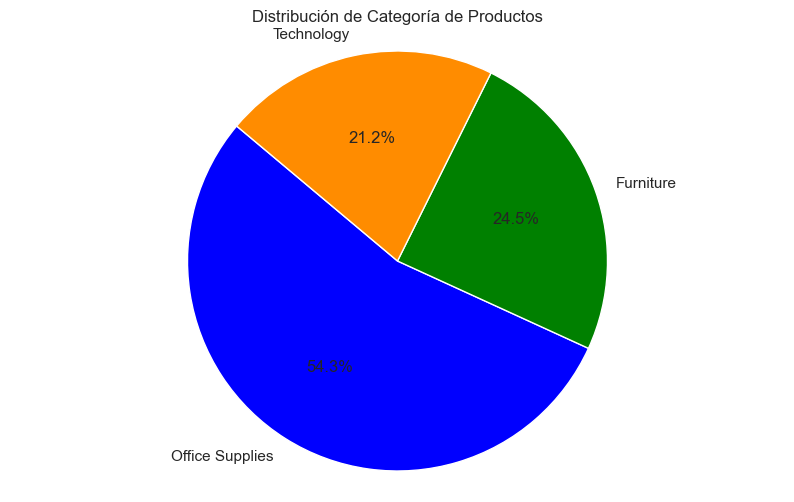

In [257]:
payment_mode_counts = dfb['Category'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'darkorange'])
plt.axis('equal')

plt.title('Distribución de Categoría de Productos')
plt.show()

### Top 10 ciudades con más transacciones

In [258]:
top_10_cities = dfb['City'].value_counts().head(10)

print("Las 10 ciudades con más transacciones son: ")
print(top_10_cities)

Las 10 ciudades con más transacciones son: 
City
New York City    483
Los Angeles      370
Philadelphia     276
San Francisco    263
Seattle          239
Houston          176
Chicago          170
Columbus         121
Dallas            97
Springfield       85
Name: count, dtype: int64


### Método de pago más utilizado por cada una de las top 10 ciudades

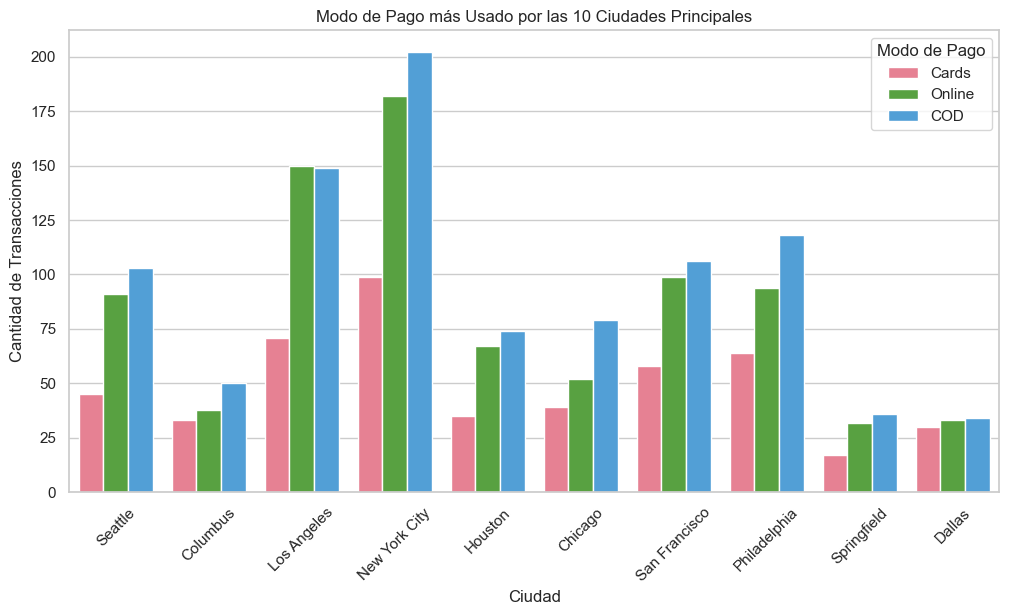

In [259]:
df_top_10_cities = dfb[dfb['City'].isin(top_10_cities.index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_cities, x='City', hue='Payment Mode')
plt.title('Modo de Pago más Usado por las 10 Ciudades Principales')
plt.xticks(rotation=45)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Modo de Pago')

plt.show()

### Categoría de producto más comprada por cada una de las 10 ciudades

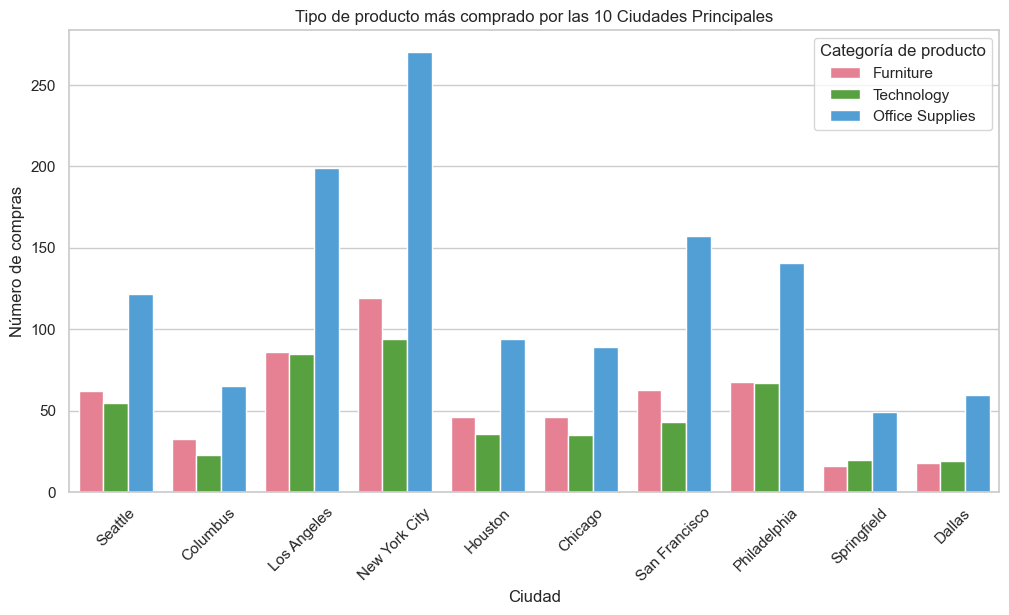

In [260]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_cities, x='City', hue='Category')
plt.title('Tipo de producto más comprado por las 10 Ciudades Principales')
plt.xticks(rotation=45)
plt.xlabel('Ciudad')
plt.ylabel('Número de compras')
plt.legend(title='Categoría de producto')

### Mostrar los productos que fueron regresados

In [261]:
returned=dfb.loc[dfb["Returns"]!= 0]
returned[['Product Name', 'Quantity', 'Returns']]


,Product Name,Quantity,Returns
0,"Bush Westfield Collection Bookcases, Medium Ch...",1,NaN
1,"Bush Westfield Collection Bookcases, Medium Ch...",3,NaN
2,Hon Practical Foundations 30 x 60 Training Tab...,7,NaN
3,"Executive Impressions 13"" Clairmont Wall Clock",3,NaN
4,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",6,NaN
...,...,...,...
5096,Eureka The Boss Plus 12-Amp Hard Box Upright V...,2,NaN
5097,GBC Binding covers,2,1.0
5098,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",2,1.0
5099,Bagged Rubber Bands,3,NaN


### Mostrar las ventas y ganancias

In [262]:
profit=dfb.loc[dfb["Profit"] >= 0]
profit[["Sales","Profit"]]

,Sales,Profit
0,73.940,28.2668
1,173.940,38.2668
2,1592.850,350.4270
4,1565.880,407.1288
5,15.168,3.7920
...,...,...
5094,282.600,9.6040
5095,478.580,10.0282
5096,509.300,56.5110
5097,496.720,6.4750


### Mostrar las transacciones con pérdidas

In [263]:
loses=dfb.loc[dfb["Profit"]<0]
loses[["Sales","Profit"]]

,Sales,Profit
3,23.076,-10.9611
10,181.797,-15.5826
12,153.568,-5.7588
15,451.136,-67.6704
18,313.722,-99.3453
...,...,...
5076,418.582,-59.3730
5078,308.132,-2.6100
5082,401.784,-12.9568
5099,388.024,-0.6048


### Mostrar el porcentaje total de ganancias y pérdidas con base en las ventas totales

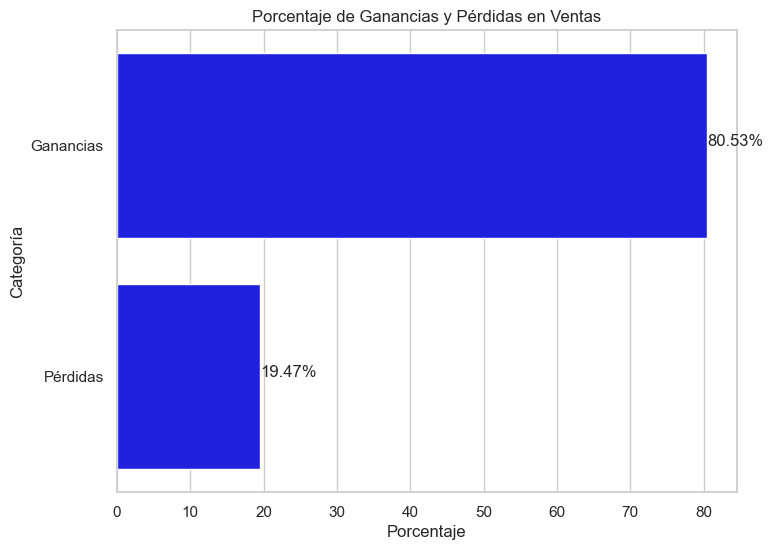

In [264]:
# Calcular los totales de ventas para ganancias y pérdidas
total_sales = dfb["Sales"].sum()
total_profit = profit["Sales"].sum()
total_loses = loses["Sales"].sum()

# Calcular los porcentajes
percentage_profit = (total_profit / total_sales) * 100
percentage_loses = (total_loses / total_sales) * 100

# Crear un DataFrame para los datos
data = {
    "Categoría": ["Ganancias", "Pérdidas"],
    "Porcentaje": [percentage_profit, percentage_loses]
}

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
colors = ["blue", "orange"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(x="Porcentaje", y="Categoría", data=data)
plt.title("Porcentaje de Ganancias y Pérdidas en Ventas")
plt.xlabel("Porcentaje")
plt.ylabel("Categoría")

# Mostrar el porcentaje en las barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha="left")

plt.show()
